# Final Notebook

In [ ]:
pip install category_encoders

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# For ML models
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OrdinalEncoder

### The Data

In [ ]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Column Descriptions
* HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
* BMI: Body Mass Index (BMI).
* Smoking: Have you smoked at least 100 cigarettes in your entire life?
* AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* Stroke: (Ever told) (you had) a stroke?
* PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
* MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
* DiffWalking: Do you have serious difficulty walking or climbing stairs?
* Sex: Are you male or female?
* AgeCategory: Fourteen-level age category. (then calculated the mean)
* Race: Imputed race/ethnicity value.
* Diabetic: (Ever told) (you had) diabetes?
* PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* GenHealth: Would you say that in general your health is...
* SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
* Asthma: (Ever told) (you had) asthma?
* KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* SkinCancer: (Ever told) (you had) skin cancer?

### The Features

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Exploratory Data Analysis (EDA)

### Feature Types

#### Numerical Features
* Continuous numerical features: BMI
* Discrete numerical features: PhysicalHealth,MentalHealth, SleepTime

####  Categorical Features
* Binary categorical features: HeartDisease, Smoking, Stroke, Asthma, AlcoholDrinking, KidneyDisease , SkinCancer, PhysicalActivity, DiffWalking
* Ordinal categorical features: AgeCategory, GenHealth
* Nominal categorical features: Race, Diabetic

### Numerical variables

In [ ]:
num_df = df._get_numeric_data()
num_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


1. BMI: body mass index which is a value derived from the mass and height of person. In this dataset, the sample mean is 28.325 which is labeled as Overweight. However, the dataset is imbalanced so it is obvious that the majority of overweighted people can still be healthy and don't have heart disease (we'll get into this later on)

2. PhysicalHealth: we can see the maximum value is 30 days and the majority is distributed at the value of 3.37 days with the really small value. The reason why we see this could be due to high amount of senior citizens (people age > 50) who typicaly are not physically fit as some younger people.

3. MentalHealth: this is similar as the PhysicalHealth with the same distribution with a slightly higher mean. 

4. SleepTime (in hours): the surveyees get pretty good amounts of sleep, with roughly 7 hours of sleep on average. Some sleep for just 1 hour, and some sleep the entire day.

#### Since one of our research question involves investigating the ATE between men and women, we compared how our numerical variables are distributed based on sex

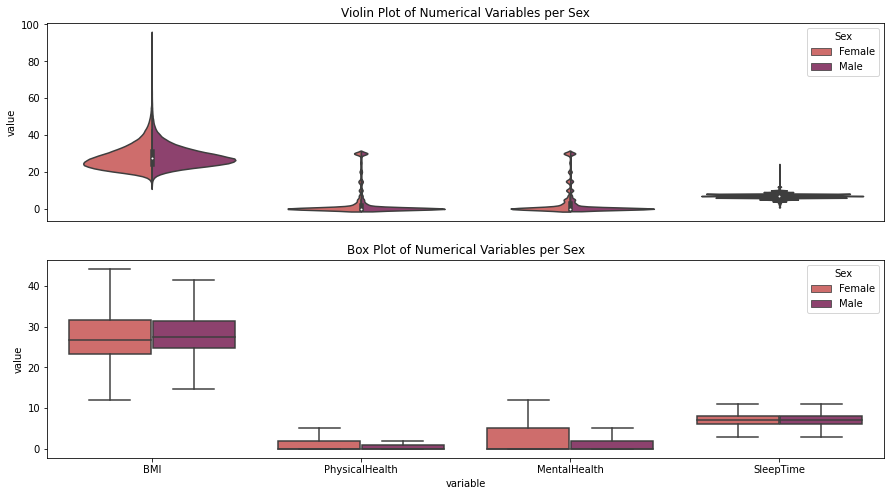

In [ ]:
#pre-plotting  
fig, ax = plt.subplots(2, figsize=(15, 8))
ax[0].axes.xaxis.set_visible(False)

#data generation 
columns = np.append(np.array(df._get_numeric_data().columns), 'Sex')
sex = df[columns].copy()
sex_long = sex.melt(id_vars=['Sex'], value_vars=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'])

#plotting
ax[0].set_title('Violin Plot of Numerical Variables per Sex')
sns.violinplot(data=sex_long, x='variable', y='value', hue='Sex', split=True, palette='flare', showfliers=False, ax = ax[0])

ax[1].set_title('Box Plot of Numerical Variables per Sex')
sns.boxplot(data=sex_long, x='variable', y='value', hue='Sex', palette='flare', showfliers=False, ax = ax[1]);

#### We now want to focus our attention to the potential linear relationships between variables (how correlated they are with each other) and with our variable of interest (heart disease)

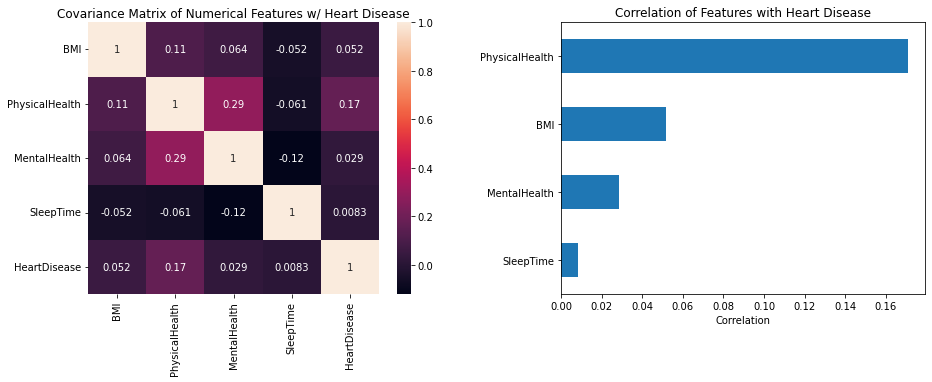

In [ ]:
#pre plotting
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
plt.subplots_adjust(wspace = 0.3)

#data
label_dict = {'Yes': 1, 'No': 0}
num_correlation = num_df.join(df['HeartDisease'].apply(lambda x: label_dict[x]))

#plotting
sns.heatmap(num_correlation.corr(), annot = True, ax = ax[0])
abs(num_correlation.corr()['HeartDisease']).sort_values()[:-1].plot.barh(ax = ax[1]);

ax[1].set_title('Correlation of Features with Heart Disease');
ax[1].set_xlabel('Correlation')
ax[0].set_title('Covariance Matrix of Numerical Features w/ Heart Disease');

The highest correlation we observe is between MentalHealth and PhysicalHealth, taking a value of 0.29. Furthermore, we can observe that Physical Health is most correlated with Heart Disease.

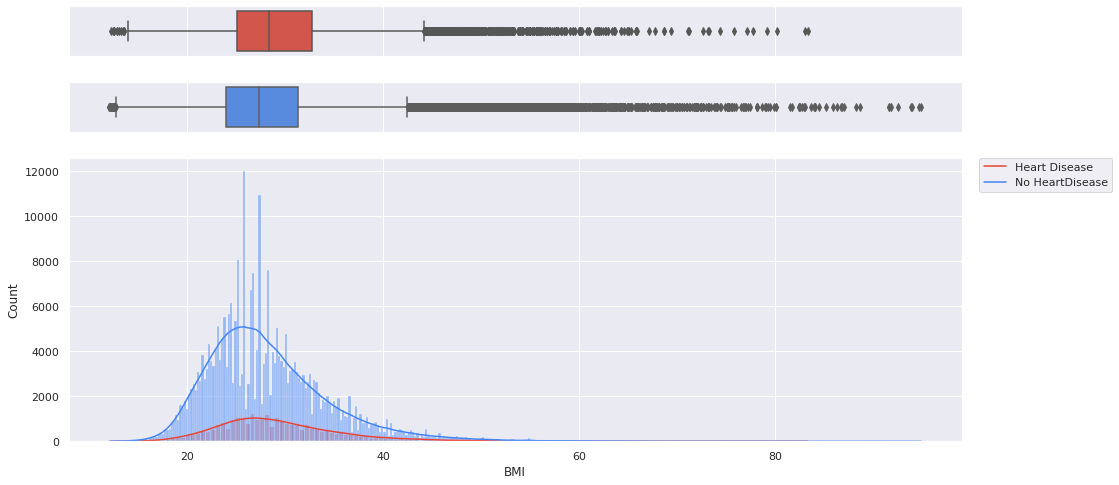

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

In [ ]:
def plot_kde(feature):
    figure, axis = plt.subplots(1, 1, figsize=(15, 5))
    sns.kdeplot(num_correlation.loc[(num_correlation['HeartDisease']==1), feature], shade=True, label='Yes')
    sns.kdeplot(num_correlation.loc[(num_correlation['HeartDisease']==0), feature], shade=True, label='No')
    plt.title(f'{feature} with Heart Disease')
    plt.legend(title='HeartDisease?', fontsize=15, title_fontsize=15)
    
    plt.show()

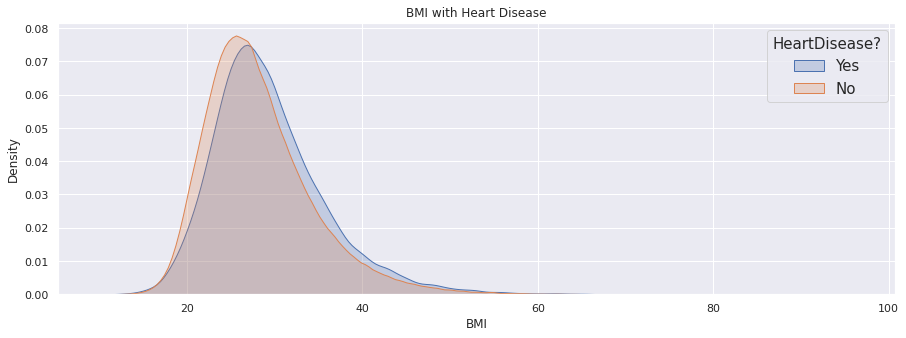

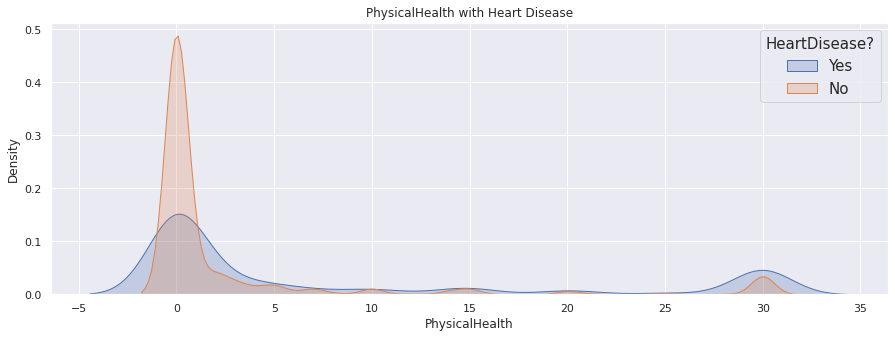

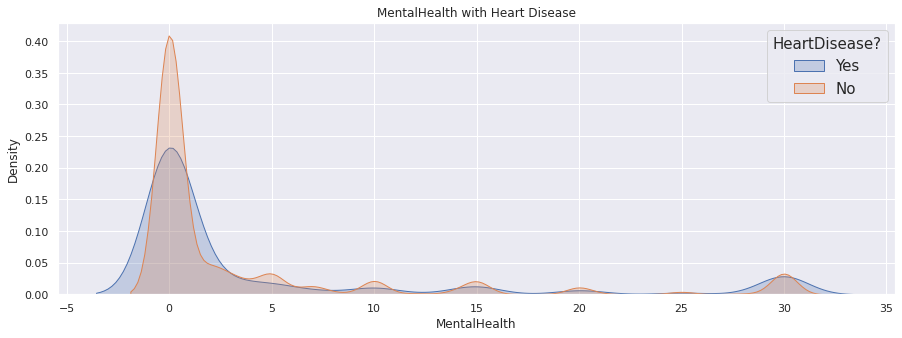

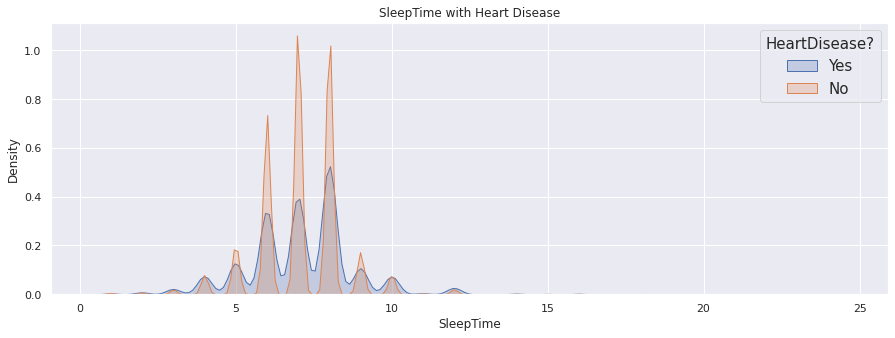

In [ ]:
for feature in num_correlation.iloc[:, :-1]:
    plot_kde(feature)

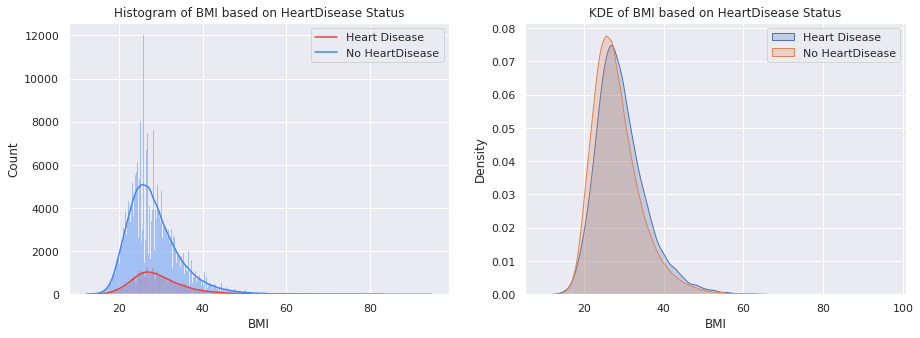

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax[0], kde=True, color="#ea4335")
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax[0], kde=True, color='#4285f4')
ax[0].set_title("Histogram of BMI based on HeartDisease Status")
ax[0].legend(labels=['Heart Disease', 'No HeartDisease'])

sns.kdeplot(num_correlation.loc[(num_correlation['HeartDisease']==1), 'BMI'], shade=True, label='Yes', ax = ax[1])
sns.kdeplot(num_correlation.loc[(num_correlation['HeartDisease']==0), 'BMI'], shade=True, label='No', ax = ax[1])
ax[1].set_title("KDE of BMI based on HeartDisease Status")
ax[1].legend(labels=['Heart Disease', 'No HeartDisease']);



#### Takeaways:

* MentalHealth and PhysicalHealth follow a similar distribution. They aren't the only reasonable indicators of heart disease.
* HeartDisease still occurs for those with normal to high hours of sleep. In fact, most of the density is located in higher hours of sleep. 
* Similar to above, people with reasonable BMIs still cannot seem to escape heart disease. There's a good chunk of the distribution in the healthy BMI range.

### Now we want to take a closer look at how age versus different types of diseases

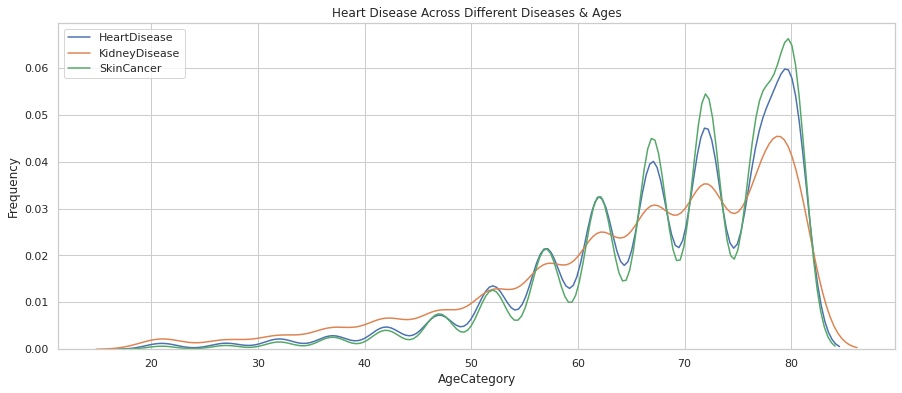

In [ ]:
#preplotting
fig = plt.figure(figsize = (15,6))
sns.set_theme(style="whitegrid")

#data creation 
AgeCategory_dict = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}

df['AgeCategory'] = df['AgeCategory'].apply(lambda x: AgeCategory_dict[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

#plotting
sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, label="HeartDisease")
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, label="KidneyDisease")
sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, label="SkinCancer")

plt.xlabel("AgeCategory")
plt.ylabel("Frequency")
plt.legend()
plt.title('Heart Disease Across Different Diseases & Ages')
plt.show()

1. MentalHealth and PhysicalHealth follow a similar distribution. They aren't the only reasonable indicators of heart disease.
2. HeartDisease still occurs for those with normal to high hours of sleep. In fact, most of the density is located in higher hours of sleep.
3. Similar to above, people with reasonable BMIs still cannot seem to escape heart disease. There's a good chunk of the distribution in the healthy BMI range.

### Categorical Variables

In [ ]:
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No


In [ ]:
cat_df.describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,245212,269653,247957,113858,276923,308016,289976


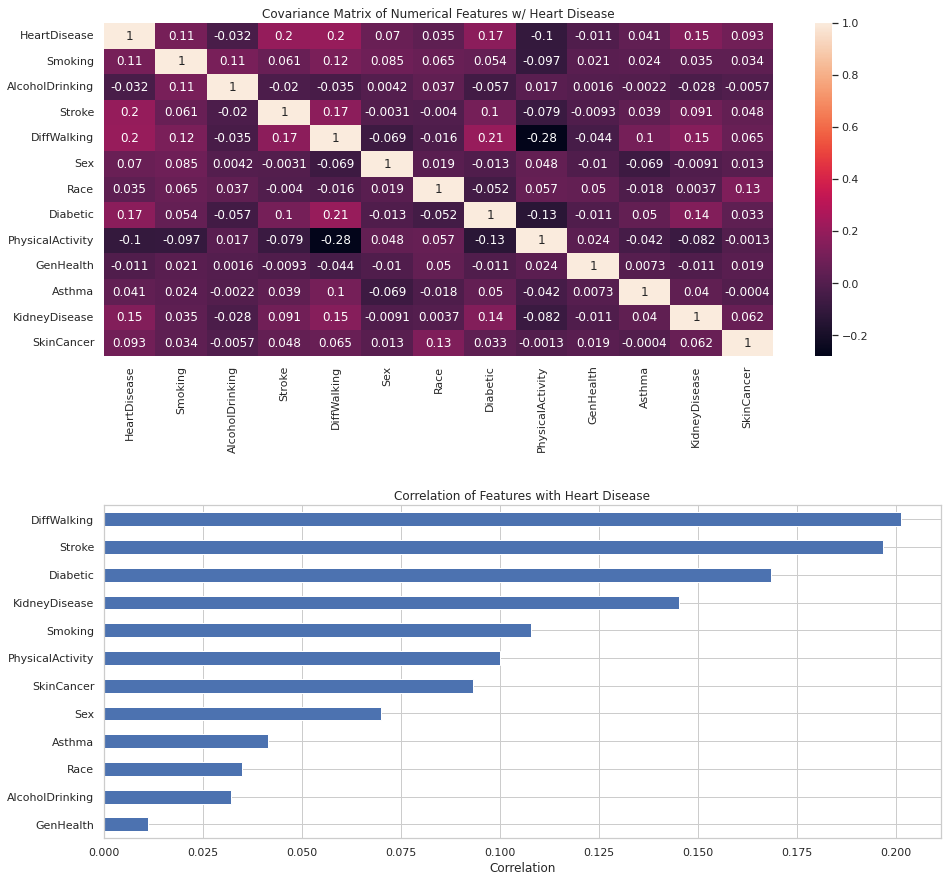

In [ ]:
#pre plotting
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 15))
plt.subplots_adjust(hspace = 0.45)

#data generation
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_encoded = encoder.fit_transform(cat_df)
df_encoded = pd.DataFrame(df_encoded, columns=cat_df.columns.tolist())

#plotting
sns.heatmap(df_encoded.corr(), annot = True, ax = ax[0])
abs(df_encoded.corr()['HeartDisease']).sort_values()[:-1].plot.barh(ax = ax[1]);

ax[1].set_title('Correlation of Features with Heart Disease');
ax[1].set_xlabel('Correlation')
ax[0].set_title('Covariance Matrix of Numerical Features w/ Heart Disease');

The strongest positive relationship in this correlation matrix is between AgeCategory and SkinCancer with a value of 0.26. The strongest negative relationship is between PhysicalActivity and DiffWalking with a value of -0.28.

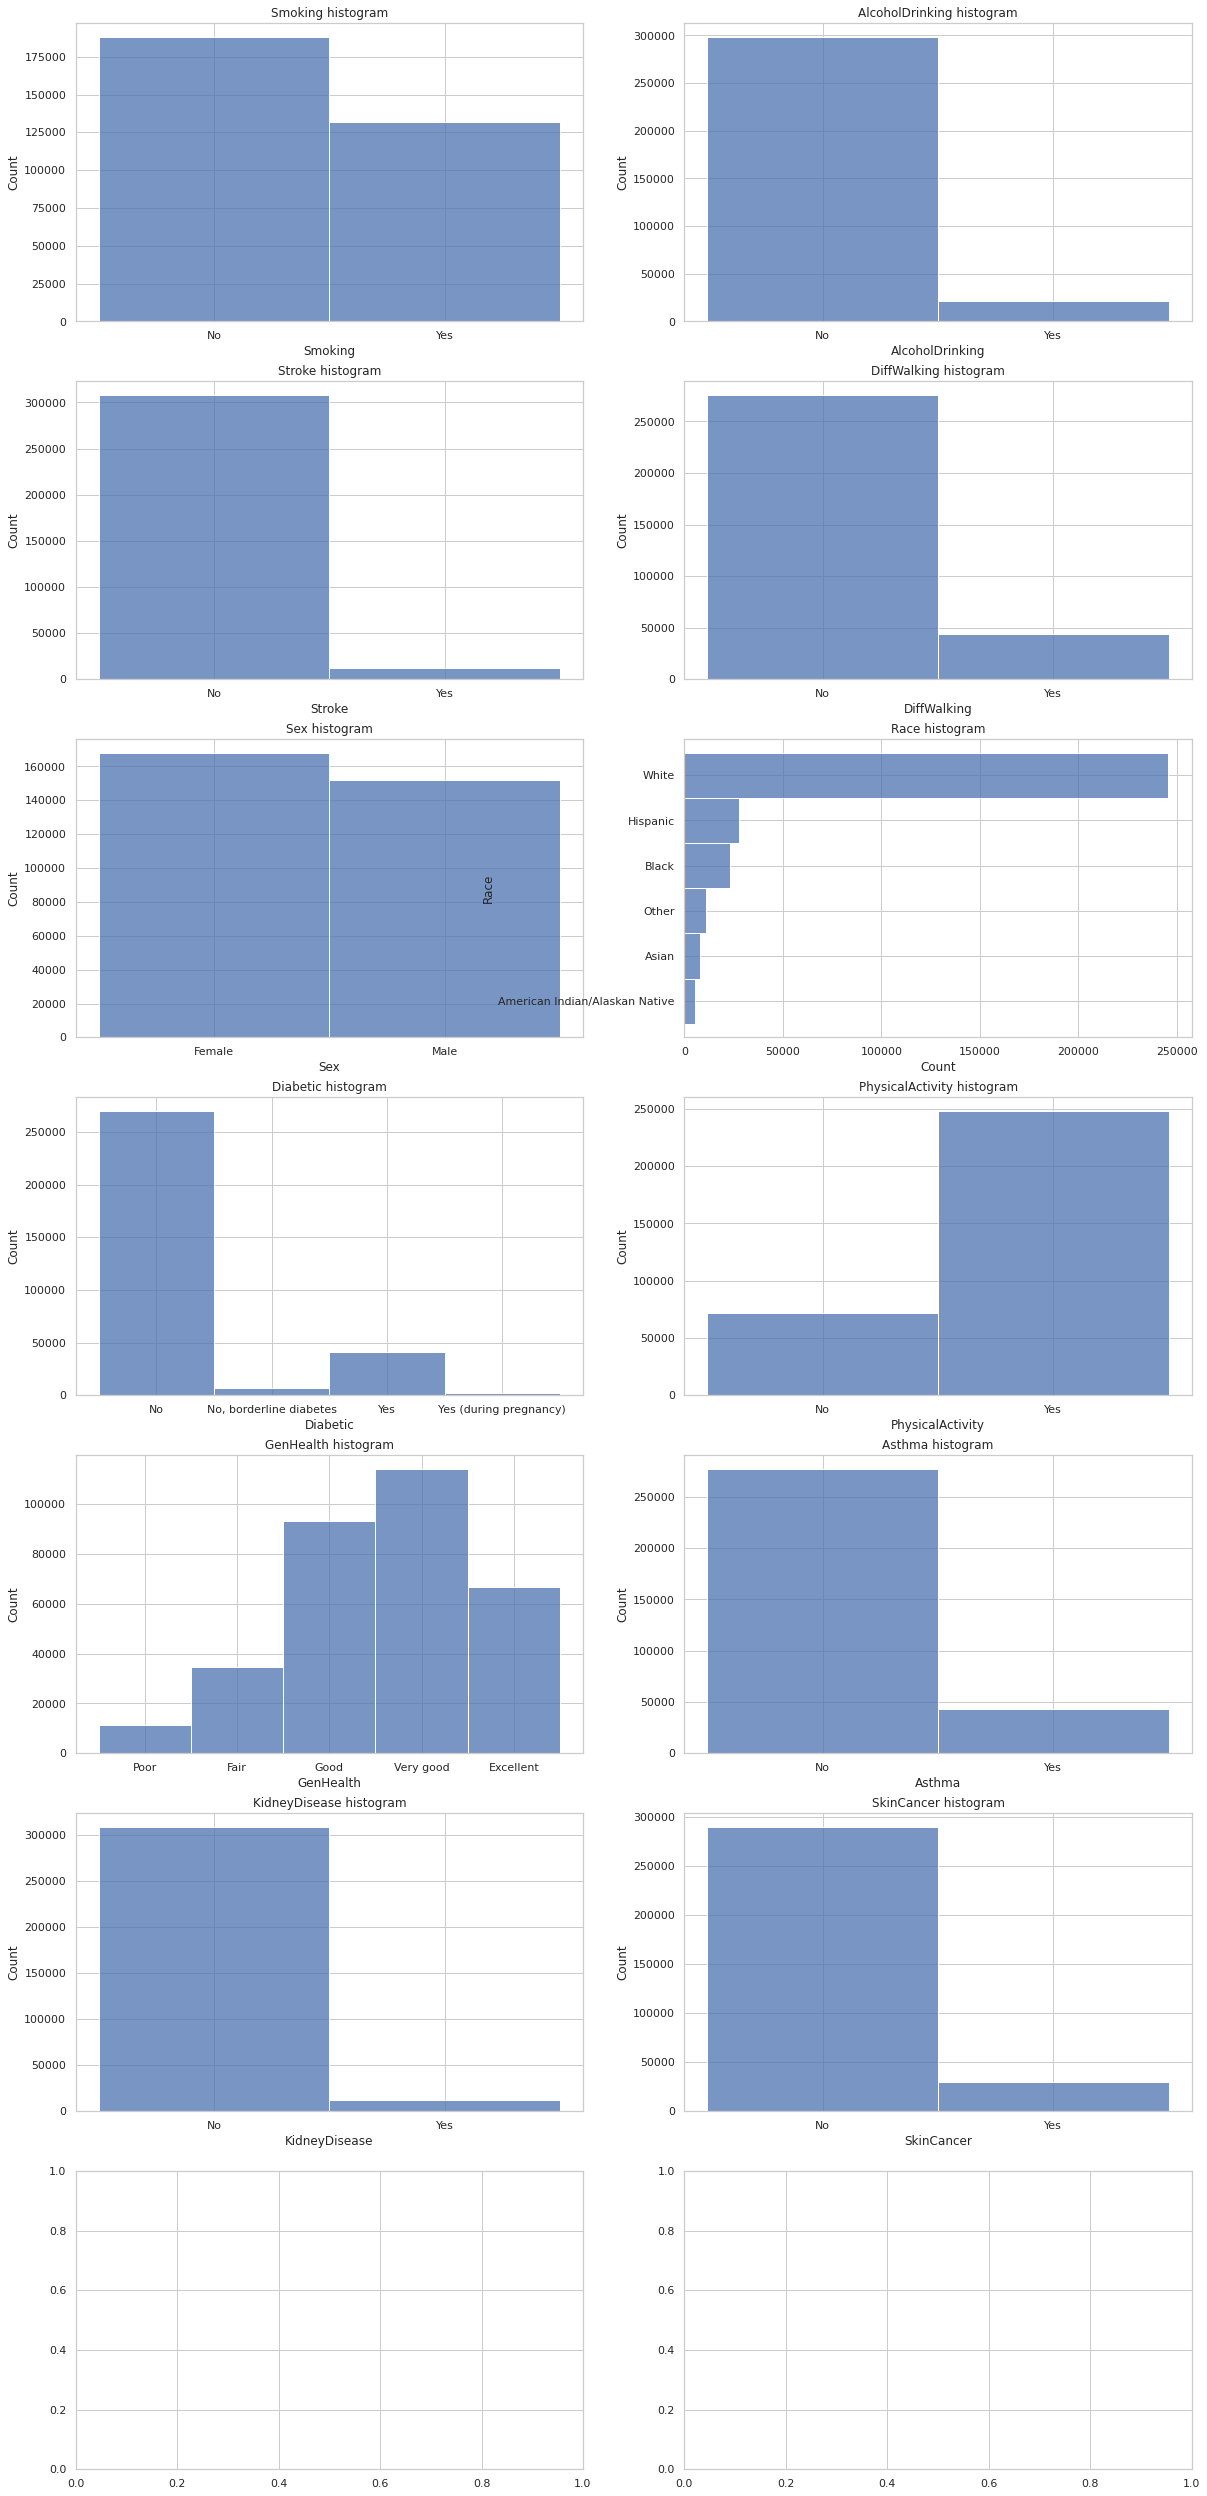

In [ ]:
position_index = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1),(5,0),(5,1),(6,0),(6,1),(7,0)]
fig,axes = plt.subplots(7,2,figsize=(20,45))

for position, feature in zip(position_index, cat_df.columns.tolist()[1:]):
    if len(cat_df[feature].unique()) > 15:
        sns.histplot(ax=axes[position],bins = 15, data=cat_df[feature].sort_values())
    else:
        if feature in ["AgeCategory", "Race"]:
            i, r = pd.factorize(cat_df[feature])
            a = np.argsort(np.bincount(i)[i], kind='mergesort')[::-1]
            sns.histplot(ax=axes[position],y=cat_df.iloc[a][feature])
        elif feature == "GenHealth":
            sns.histplot(ax=axes[position],data=pd.Categorical(cat_df.GenHealth, categories=["Poor","Fair","Good","Very good","Excellent"], ordered=True))
            axes[position].set(xlabel=feature)
        else:
            sns.histplot(ax=axes[position],data=cat_df[feature].sort_values())
    axes[position].set_title(f'{feature} histogram')

In [ ]:
def plot_hist(feature):
    figure, axis = plt.subplots(1, 1, figsize=(15, 5))
    sns.histplot(data=cat_df, x=feature, hue="HeartDisease", multiple="dodge", shrink=.8, hue_order = ['Yes', 'No'])
    plt.title(f'{feature} with Heart Disease')
    plt.show()

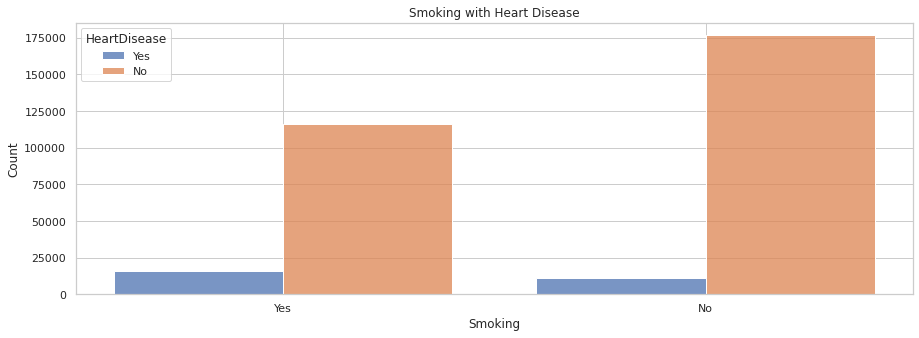

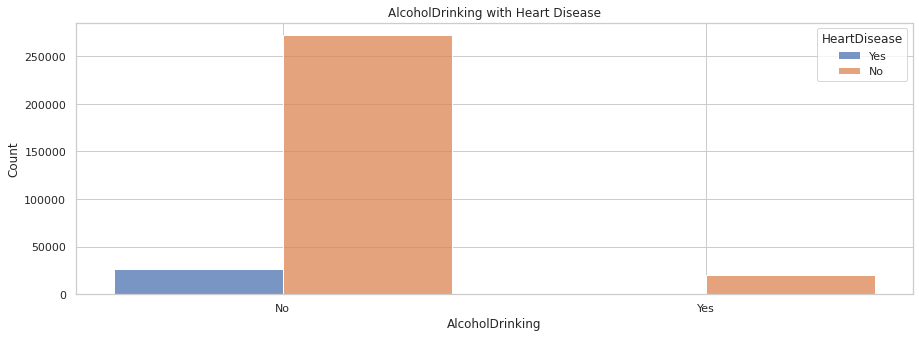

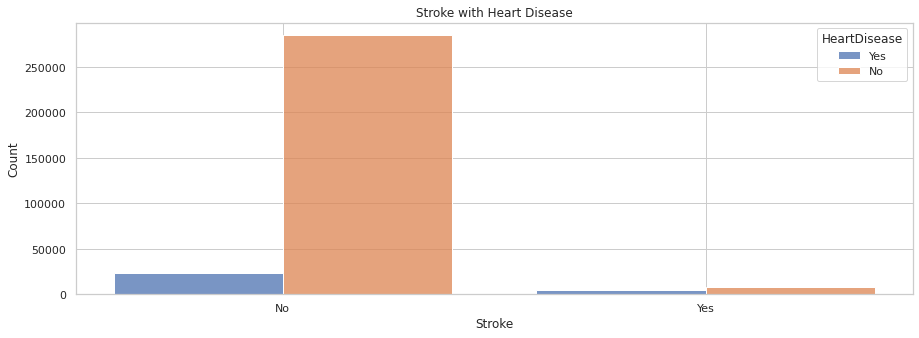

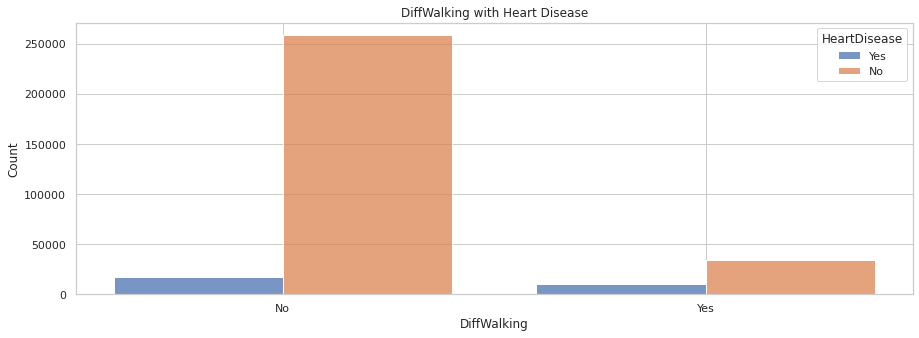

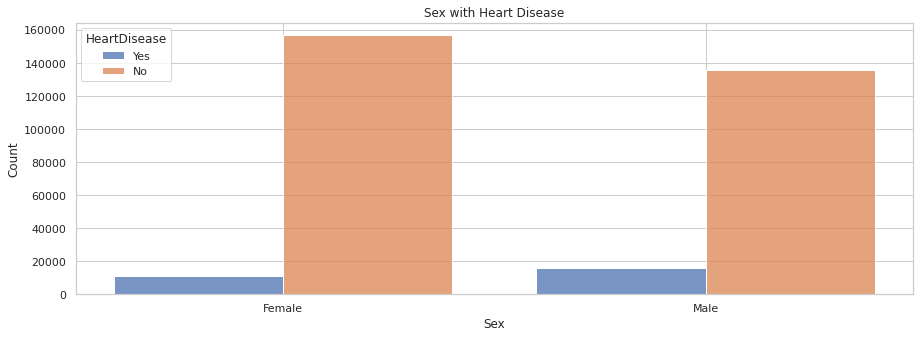

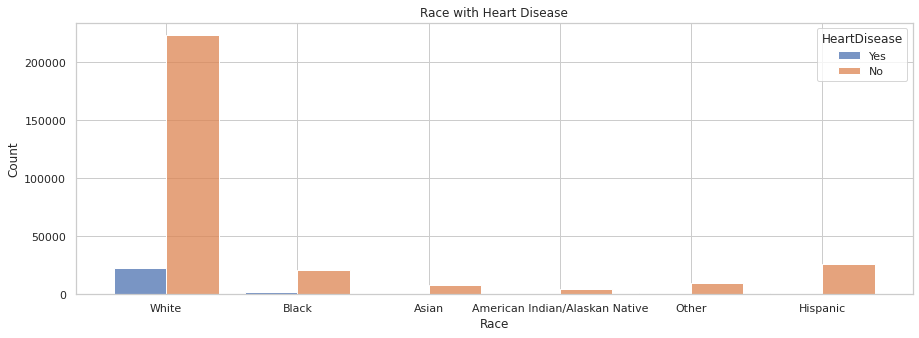

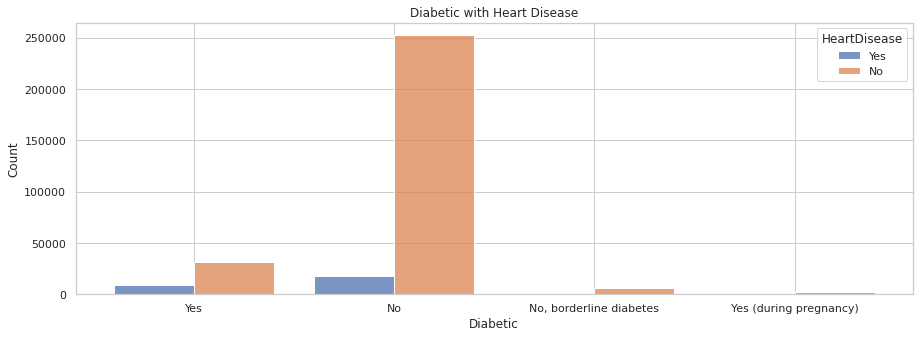

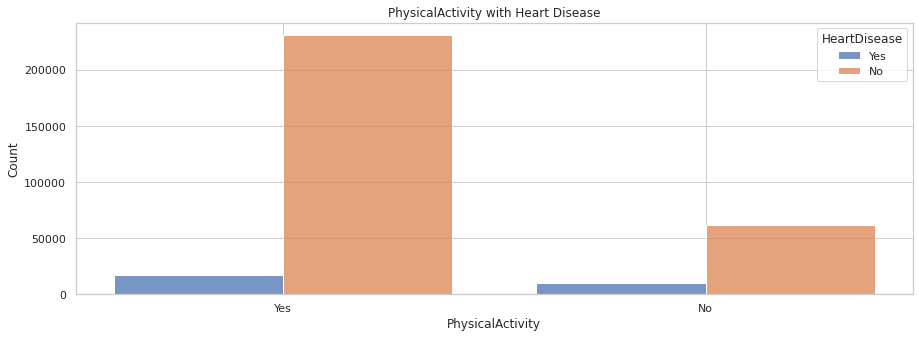

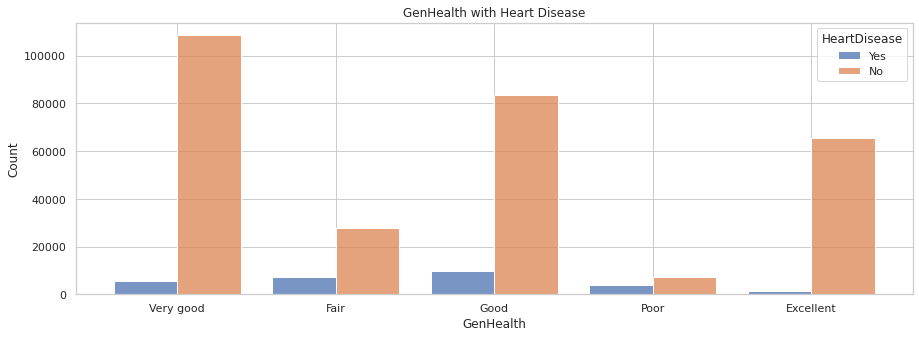

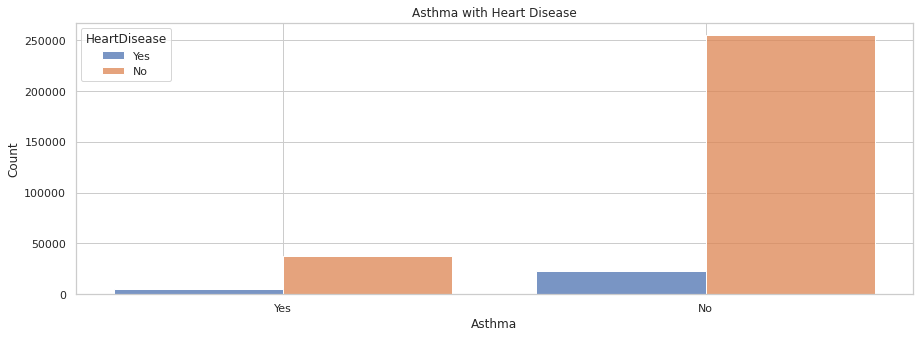

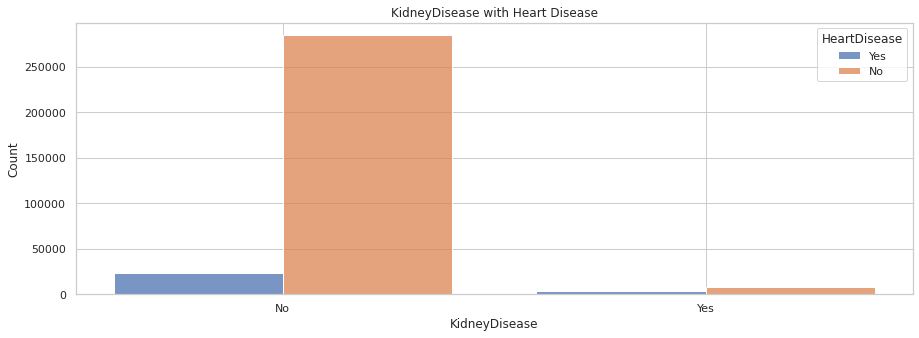

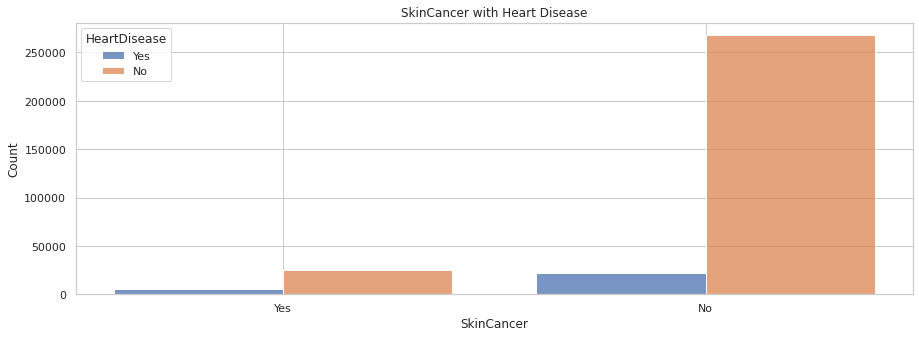

In [ ]:
for feature in cat_df.iloc[:, 1:]:
    plot_hist(feature)

### Takeaways:
#### Sex - 
* There are more Male patients with heart disease than there are Female
* But overall, more Females were tested than males
* Males are approximately 1.6 times more likely to have heart disease than females

#### Smoking - 
* Most heart disease patients do smoke
* People who smoke are approximately twice as likely to have heart disease than people who don't smoke

#### Race - 
* Most heart disease patients are White people, however, the vast majority of people surveys were also White.

#### KidneyDisease - 
* Most of the patients don't have KidneyDisease

#### Other -
* There is no noticeable differences between adults with and without heart disease in being a heavy drinker or having asthma.
* Nevertheless people who have heart disease seem to experience stroke and difficulty while walking more than those who don’t.
* Finally people who are diagnosed with and without heart disease are slightly distinct in physical activity, diagnosed with kidney disease or skin cancer.
* There might be a strong correlation between increasing age and the presence of heart disease.
* Asian and Hispanic responders seem to have lower heart disease than other peers but further analysis is necessary to confirm this statement.
* Adults with diabetes seem to have high rate of having heart diseases.
* Adults who considered Fair or Poor general health have higher chance of diagnosed with heart diseases.

In [ ]:
cat_df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,Hispanic,No,No,Good,No,No,No


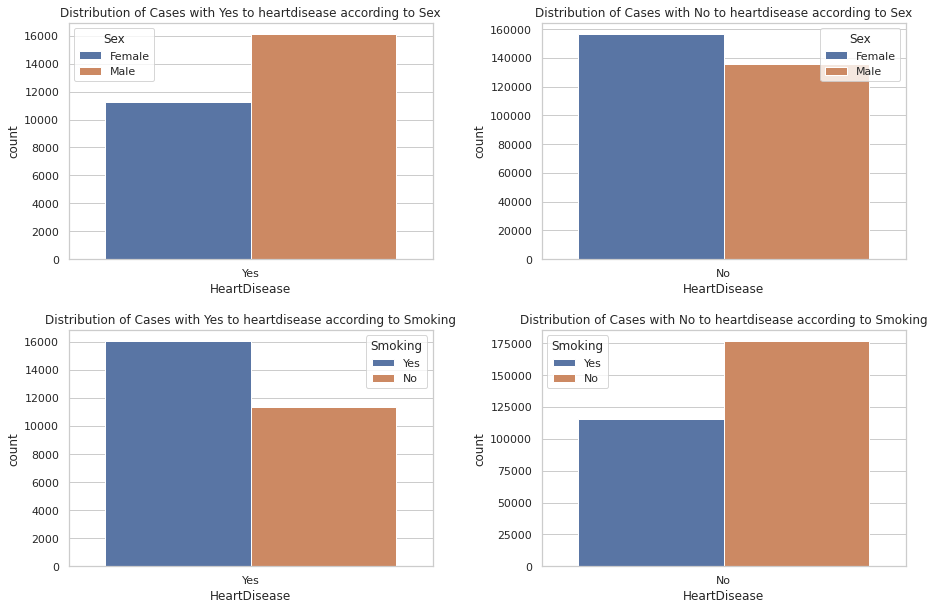

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)

sns.countplot(data = cat_df[cat_df["HeartDisease"]=='Yes'], x = 'HeartDisease', hue = 'Sex', ax = ax[0][0])
sns.countplot(data = cat_df[cat_df["HeartDisease"]=='No'], x = 'HeartDisease', hue = 'Sex', ax = ax[0][1])

sns.countplot(data = cat_df[cat_df["HeartDisease"]=='Yes'], x = 'HeartDisease', hue = 'Smoking', ax = ax[1][0])
sns.countplot(data = cat_df[cat_df["HeartDisease"]=='No'], x = 'HeartDisease', hue = 'Smoking', ax = ax[1][1]);

ax[0][0].set_title("Distribution of Cases with Yes to heartdisease according to Sex")
ax[0][1].set_title("Distribution of Cases with No to heartdisease according to Sex")
ax[1][0].set_title("Distribution of Cases with Yes to heartdisease according to Smoking")
ax[1][1].set_title("Distribution of Cases with No to heartdisease according to Smoking");



# Causal Inference

In [ ]:
df_categorical = cat_df
df_categorical

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,Hispanic,No,No,Good,No,No,No


In [ ]:
##CAUSAL INFERENCE
import pandas as pd

#Convert table from catagorical to dummies#
cat_col_names = list(cat_df.head().columns) 

dataCat = pd.concat([
    df.drop(columns=cat_col_names),
    pd.get_dummies(df[cat_col_names], columns=cat_col_names,drop_first=False)], axis=1)

dataCat.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime',
       'HeartDisease_No', 'HeartDisease_Yes', 'Smoking_No', 'Smoking_Yes',
       'AlcoholDrinking_No', 'AlcoholDrinking_Yes', 'Stroke_No', 'Stroke_Yes',
       'DiffWalking_No', 'DiffWalking_Yes', 'Sex_Female', 'Sex_Male',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_No',
       'Asthma_Yes', 'KidneyDisease_No', 'KidneyDisease_Yes', 'SkinCancer_No',
       'SkinCancer_Yes'],
      dtype='object')

In [ ]:
##FITTING OLS MODEL
import statsmodels.api as sm
def OLS_model(df, target_variable, explanatory_variables, intercept = True):
    target = df[target_variable]
    inputs = df[explanatory_variables] 
    if intercept:
        inputs = sm.add_constant(inputs)
    fitted_model = sm.OLS(target, inputs).fit() 
    return(fitted_model)

##OLS MODEL FOR MALE
OLS_model2 = OLS_model(dataCat,['HeartDisease_Yes'],['Sex_Male','BMI','Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'PhysicalHealth', 'MentalHealth', 'DiffWalking_Yes', 'AgeCategory', 'Diabetic_Yes', 'PhysicalActivity_Yes', 'SleepTime', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes'])
OLS_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       HeartDisease_Yes   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     3225.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        02:55:53   Log-Likelihood:                -23886.
No. Observations:              319795   AIC:                         4.780e+04
Df Residuals:                  319779   BIC:                         4.797e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1144      0.004    -29.941      0.000      -0.122      -0.107
Sex_Male                 0.0487      0.001     51.678      0.000       0.047       0.051
BMI                  -6.006e-05   7.58e-05     -0.792      0.428      -0.000    8.86e-05
Smoking_Yes              0.0260      0.001     26.784      0.000       0.024       0.028
AlcoholDrinking_Yes     -0.0169      0.002     -9.126      0.000      -0.021      -0.013
Stroke_Yes               0.1919      0.002     77.215      0.000       0.187       0.197
PhysicalHealth           0.0024   6.75e-05     34.995      0.000       0.002       0.002
MentalHealth             0.0005   6.29e-05      7.572      0.000       0.000       0.001
DiffWalking_Yes          0.0578      0.002     36.654      0.000       0.055       0.061
AgeCategory              0.0024   2.95e-05     82.625      0.000       0.002       0.002
Diabetic_Yes             0.0745      0.001     50.410      0.000       0.072       0.077
PhysicalActivity_Yes    -0.0096      0.001     -8.147      0.000      -0.012      -0.007
SleepTime             -1.72e-05      0.000     -0.053      0.958      -0.001       0.001
Asthma_Yes               0.0213      0.001     15.437      0.000       0.019       0.024
KidneyDisease_Yes        0.1107      0.003     43.999      0.000       0.106       0.116
SkinCancer_Yes           0.0278      0.002     16.874      0.000       0.025       0.031
==============================================================================
Omnibus:                   154326.807   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728561.611
Skew:                           2.426   Prob(JB):                         0.00
Kurtosis:                       8.581   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##OLS MODEL FOR FEMALE
OLS_model2 = OLS_model(dataCat,['HeartDisease_Yes'],['Sex_Female','BMI','Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'PhysicalHealth', 'MentalHealth', 'DiffWalking_Yes', 'AgeCategory', 'Diabetic_Yes', 'PhysicalActivity_Yes', 'SleepTime', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']) 
OLS_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       HeartDisease_Yes   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     3225.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        02:55:54   Log-Likelihood:                -23886.
No. Observations:              319795   AIC:                         4.780e+04
Df Residuals:                  319779   BIC:                         4.797e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0657      0.004    -17.248      0.000      -0.073      -0.058
Sex_Female              -0.0487      0.001    -51.678      0.000      -0.051      -0.047
BMI                  -6.006e-05   7.58e-05     -0.792      0.428      -0.000    8.86e-05
Smoking_Yes              0.0260      0.001     26.784      0.000       0.024       0.028
AlcoholDrinking_Yes     -0.0169      0.002     -9.126      0.000      -0.021      -0.013
Stroke_Yes               0.1919      0.002     77.215      0.000       0.187       0.197
PhysicalHealth           0.0024   6.75e-05     34.995      0.000       0.002       0.002
MentalHealth             0.0005   6.29e-05      7.572      0.000       0.000       0.001
DiffWalking_Yes          0.0578      0.002     36.654      0.000       0.055       0.061
AgeCategory              0.0024   2.95e-05     82.625      0.000       0.002       0.002
Diabetic_Yes             0.0745      0.001     50.410      0.000       0.072       0.077
PhysicalActivity_Yes    -0.0096      0.001     -8.147      0.000      -0.012      -0.007
SleepTime             -1.72e-05      0.000     -0.053      0.958      -0.001       0.001
Asthma_Yes               0.0213      0.001     15.437      0.000       0.019       0.024
KidneyDisease_Yes        0.1107      0.003     43.999      0.000       0.106       0.116
SkinCancer_Yes           0.0278      0.002     16.874      0.000       0.025       0.031
==============================================================================
Omnibus:                   154326.807   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728561.611
Skew:                           2.426   Prob(JB):                         0.00
Kurtosis:                       8.581   Cond. No.                         534.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##PROPENSITY SCORING##
from sklearn.linear_model import LogisticRegression
import pandas as pd
T = 'Sex_Male'
Y = 'HeartDisease_Yes'
X = dataCat.columns.drop(['Sex_Female','HeartDisease_No',T, Y])

lg_Model = LogisticRegression(solver='lbfgs',max_iter=10000).fit(dataCat[X],dataCat[T])

data_ps = df.assign(propensity_score= lg_Model.predict_proba(dataCat[X])[:,1])

data_ps.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,propensity_score
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0.335630
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No,0.398471
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No,0.294084
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes,0.423068
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No,0.402078


Text(0.5, 1.0, 'Propensity score of people receiving the treatment aka Male')

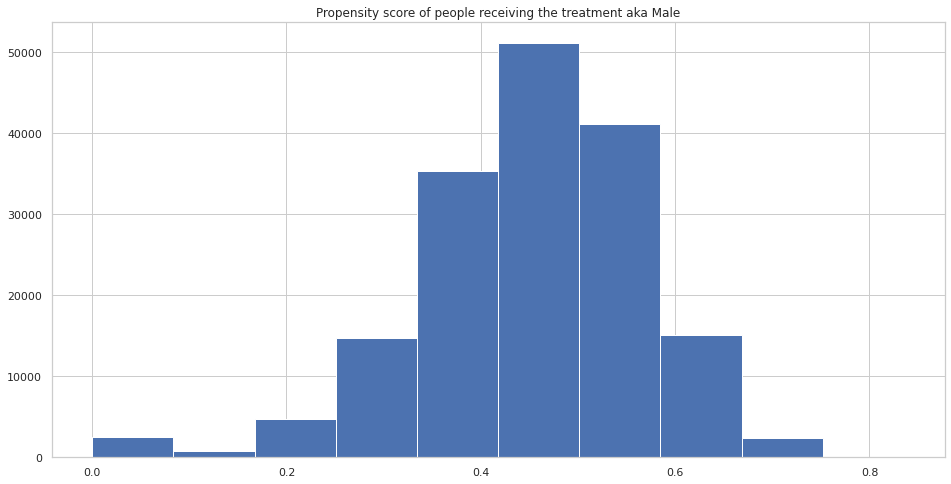

In [ ]:
plt.hist(data_ps[data_ps['Sex'] == 'Female']['propensity_score'])
plt.title("Propensity score of people receiving the treatment aka Male")

Text(0.5, 1.0, 'Propensity score of people not receiving the treatment aka Female')

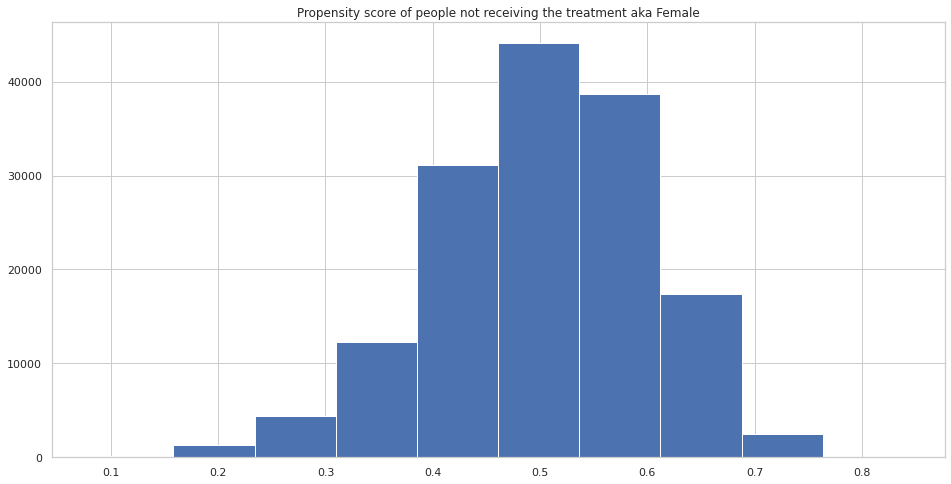

In [ ]:
plt.hist(data_ps[data_ps['Sex'] == 'Male']['propensity_score'])
plt.title('Propensity score of people not receiving the treatment aka Female')

# Data Transformation

In [ ]:
data = pd.read_csv('heart_2020_cleaned.csv')
data.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [ ]:
# Enconding categorical variables
t_df = data

# Binary encoding variables: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, 
# Physical Activity, Asthma, KidneyDisease, SkinCancer
binary_cols = ['HeartDisease','Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking',
                'PhysicalActivity','KidneyDisease','SkinCancer']

for col in binary_cols:
    t_df[col] = t_df[col].replace(list(t_df[col].unique()),[0,1])

In [ ]:
t_df.head(3)#['Diabetic'].unique()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,55-59,White,Yes,0,Very good,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,80 or older,White,No,0,Very good,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,65-69,White,Yes,0,Fair,8.0,0,0,1


In [ ]:
# One hot encoding for Race variable
race_encoder = ce.OneHotEncoder(cols='Race',handle_unknown='return_nan',return_df=True,use_cat_names=True)

# One hot encoding for Diabetic variable
diabetic_encoder = ce.OneHotEncoder(cols='Diabetic', handle_unknown='return_nan', 
                                        return_df=True, use_cat_names=True)

In [ ]:
#Ordinal encoding for AgeCategory and GenHealth variables
age_encoder= ce.OrdinalEncoder(cols=['AgeCategory'],return_df=True,
                           mapping=[{'col':'AgeCategory',
'mapping': {'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,
            '55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}}])


health_encoder = ce.OrdinalEncoder(cols=['GenHealth'], return_df=True,
                                    mapping=[{'col':'GenHealth',
                                            'mapping':{'Poor':0,'Fair':1,'Good':2,
                                                        'Very good':3,'Excellent':4}}])

t_df = age_encoder.fit_transform(t_df)
t_df = health_encoder.fit_transform(t_df)
t_df = race_encoder.fit_transform(t_df)
t_df = diabetic_encoder.fit_transform(t_df)
t_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,7,...,1.0,0.0,0.0,0.0,0,3,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,12,...,0.0,1.0,0.0,0.0,0,3,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,9,...,1.0,0.0,0.0,0.0,0,1,8.0,0,0,1
3,0,24.21,1,0,0,0.0,0.0,0,0,11,...,0.0,1.0,0.0,0.0,1,2,6.0,1,0,0
4,0,23.71,1,0,0,28.0,0.0,1,0,4,...,0.0,1.0,0.0,0.0,0,3,8.0,1,0,1


In [ ]:
t_df.shape

(319795, 26)

In [ ]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
names = t_df.columns
d = scaler.fit_transform(t_df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,0.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,...,1.0,0.0,0.0,0.0,0.0,0.75,0.173913,0.0,0.0,0.0
1,0.0,0.100447,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.75,0.260870,1.0,0.0,1.0
2,0.0,0.175782,0.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,...,1.0,0.0,0.0,0.0,0.0,0.25,0.304348,0.0,0.0,1.0


In [ ]:
t_df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,7,...,1.0,0.0,0.0,0.0,0,3,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,12,...,0.0,1.0,0.0,0.0,0,3,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,9,...,1.0,0.0,0.0,0.0,0,1,8.0,0,0,1


In [ ]:
cat_cols = t_df.drop(num_df.columns, axis = 1).columns
cat_cols

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race_White', 'Race_Black', 'Race_Asian',
       'Race_American Indian/Alaskan Native', 'Race_Other', 'Race_Hispanic',
       'Diabetic_Yes', 'Diabetic_No', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(num_df)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(num_df)
standardized_df = pd.DataFrame(scaled_features, columns = num_df.columns)
standardized_df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.844750,-0.046751,3.281069,-1.460354
1,-1.256338,-0.424070,-0.490039,-0.067601
2,-0.274603,2.091388,3.281069,0.628776
3,-0.647473,-0.424070,-0.490039,-0.763977
4,-0.726138,3.097572,-0.490039,0.628776


In [ ]:
df = pd.concat([standardized_df, t_df[cat_cols]], axis = 1)
df.head(3)

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,...,Race_Hispanic,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,-1.844750,-0.046751,3.281069,-1.460354,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0,3,0,0,0
1,-1.256338,-0.424070,-0.490039,-0.067601,0,1,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0,3,1,0,1
2,-0.274603,2.091388,3.281069,0.628776,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0,1,0,0,1


### Finding Correlation

In [ ]:
from sklearn.metrics import matthews_corrcoef

cols = scaled_df.columns
corr = []

for col in cols:
    if col in binary_cols:
        corr.append(matthews_corrcoef(scaled_df['HeartDisease'], scaled_df[col]))
    else:
        corr.append(scaled_df['HeartDisease'].corr(scaled_df[col]))


correlation = pd.DataFrame(list(zip(cols, corr)), columns=['Variables','Corr_with_HeartDisease'])
correlation.drop(index=correlation.index[:1], axis=0, inplace=True)
correlation

,Variables,Corr_with_HeartDisease
1,BMI,0.051803
2,Smoking,-0.107764
3,AlcoholDrinking,-0.032080
4,Stroke,0.196835
5,PhysicalHealth,0.170721
6,MentalHealth,0.028591
7,DiffWalking,0.201258
8,Sex,0.070040
9,AgeCategory,0.233432
10,Race_White,0.040121


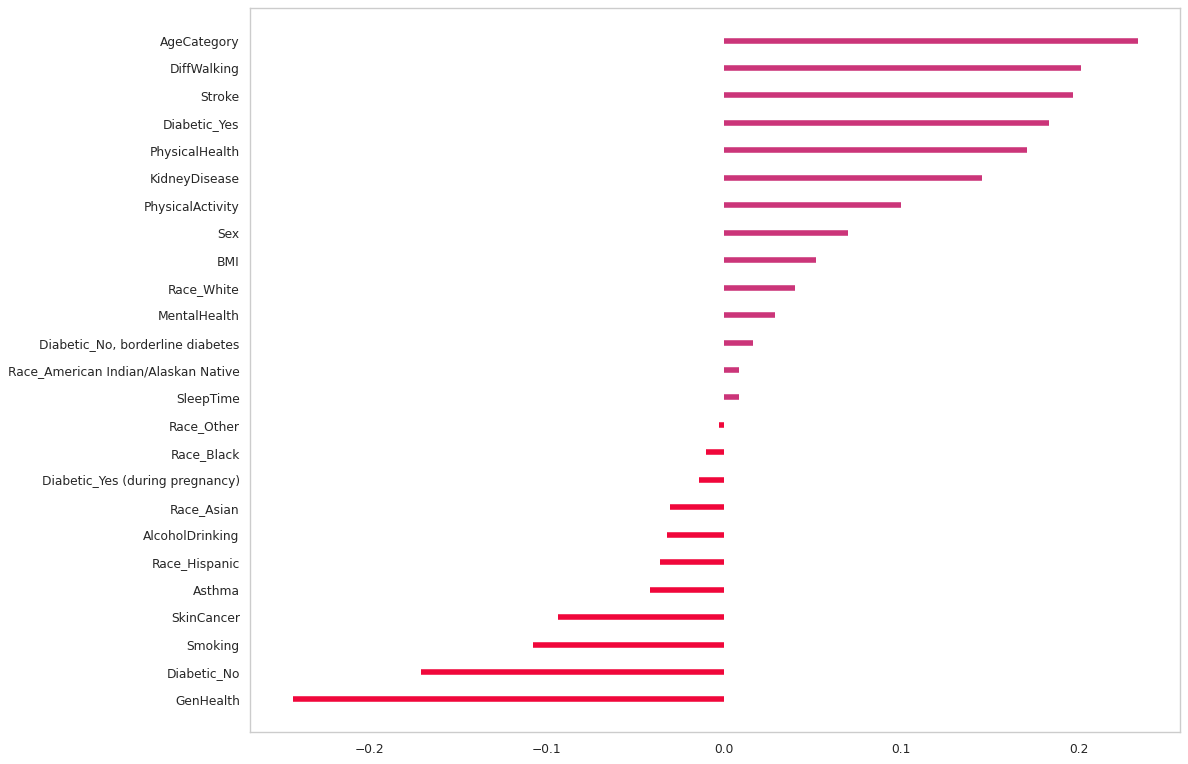

In [ ]:
for i in range(len(correlation)):
    # Colour of bar chart is set to red if corr is < 0 and green otherwise
    correlation['colors'] = ['#F0073B' if float(x) <= 0 else '#CB3579' for x in correlation['Corr_with_HeartDisease']]

correlation = correlation.sort_values(ascending=True, by=['Corr_with_HeartDisease']) 

plt.figure(figsize=(15,12), dpi=80)

plt.hlines(y=correlation.Variables, xmin=0, xmax=correlation.Corr_with_HeartDisease, 
            color=correlation.colors,  linewidth=5)

plt.grid()
plt.show()

# Modeling

#### To find the best way to predict heart disease with given and chosen indicators, we will try different classifier methods including: Logistic Regression, K-Nearest Neighbors, and Random Forests.

#### To evaluate the effectiveness of the these classification models, we will use the confusion matrix, precision, recall, and the f1 score.

Sklearn modules, function used
* ensemble: RandomForestClassfier
* neighbors: KneighborsClassifier
* linear_model: LogisticRegression
* metrics: precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

### Train-Test Split

In [ ]:
top_cols = correlation.sort_values('Corr_with_HeartDisease', ascending=False)['Variables'][:10]

In [ ]:
# Create training and testing data for machine learning application
x = scaled_df.drop('HeartDisease', axis = 1)
#[['AgeCategory','DiffWalking','Stroke','Diabetic_Yes','Diabetic_No']]#,'KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
y = scaled_df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head(3)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race_White,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
95877,0.136545,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.916667,1.0,...,0.0,1.0,0.0,0.0,0.0,0.75,0.260870,1.0,0.0,1.0
228939,0.186406,0.0,0.0,1.0,1.000000,0.000000,0.0,1.0,0.583333,1.0,...,0.0,1.0,0.0,0.0,0.0,0.50,0.217391,1.0,0.0,1.0
260256,0.249547,1.0,0.0,0.0,0.066667,0.066667,0.0,1.0,0.500000,0.0,...,0.0,1.0,0.0,0.0,1.0,0.75,0.304348,1.0,0.0,1.0


In [ ]:
x_train.shape

(255836, 25)

### Logistic Regression

In [ ]:
# Create LogisticRegression
model_lr = LogisticRegression(random_state = 42, solver = 'liblinear')
model_lr.fit(x_train, y_train)
lr_y_pred = model_lr.predict(x_test)

In [ ]:
# caclulate FNR
lr_df = pd.DataFrame({'y' : list(y_test), 'y_pred' : lr_y_pred})
fn = len(lr_df[(lr_df['y'] == 1) & (lr_df['y_pred'] == 0)])
fp = len(lr_df[(lr_df['y'] == 0) & (lr_df['y_pred'] == 1)])
tn = len(lr_df[(lr_df['y'] == 0) & (lr_df['y_pred'] == 0)])
tp = len(lr_df[(lr_df['y'] == 1) & (lr_df['y_pred'] == 1)])
fnr = fn / (fn + tp)
tpr = tp / (fn + tp)
tnr = tn / (tn + fp)
fpr = fp / (tn + fp)
precision = tp / (tp + fp)
print(tpr, precision, fnr, tnr, fpr)

0.10371959942775394 0.5330882352941176 0.8962804005722461 0.9912964517621259 0.00870354823787414


Accuracy: 0.9137
F1 Score: 0.17365269461077845
Precission_score: 0.5330882352941176
Recall_score: 0.10371959942775394
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     58367
         1.0       0.53      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959



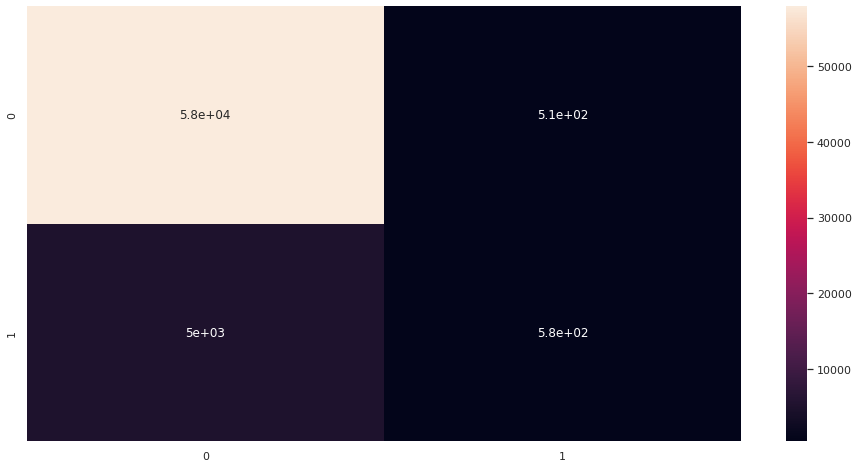

In [ ]:
lr_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_matrix, annot=True)

accuracy = round(accuracy_score(y_test, lr_y_pred), 4)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, lr_y_pred)
print("F1 Score:", f1)
report = classification_report(y_test, lr_y_pred)
print(f'Precission_score: {precision_score(y_test, lr_y_pred)}')
print(f'Recall_score: {recall_score(y_test, lr_y_pred)}')
print("Classification Report:\n", report)

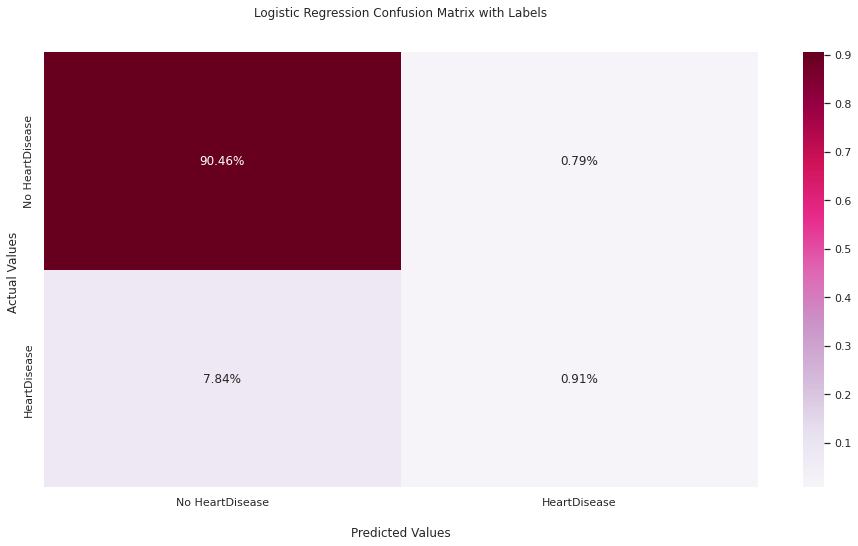

In [ ]:
ax = sns.heatmap(lr_matrix / np.sum(lr_matrix), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Logistic Regression Confusion Matrix with Labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

feature_importances = model_lr.coef_[0]

importances = pd.DataFrame(index = x_train.columns, data = feature_importances,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
importances

,Feature Importance
AgeCategory,3.247682
Stroke,1.028434
BMI,0.789575
Sex,0.724297
KidneyDisease,0.564934
DiffWalking,0.214559
MentalHealth,0.112694
PhysicalHealth,0.054708
PhysicalActivity,-0.020377
SkinCancer,-0.108913


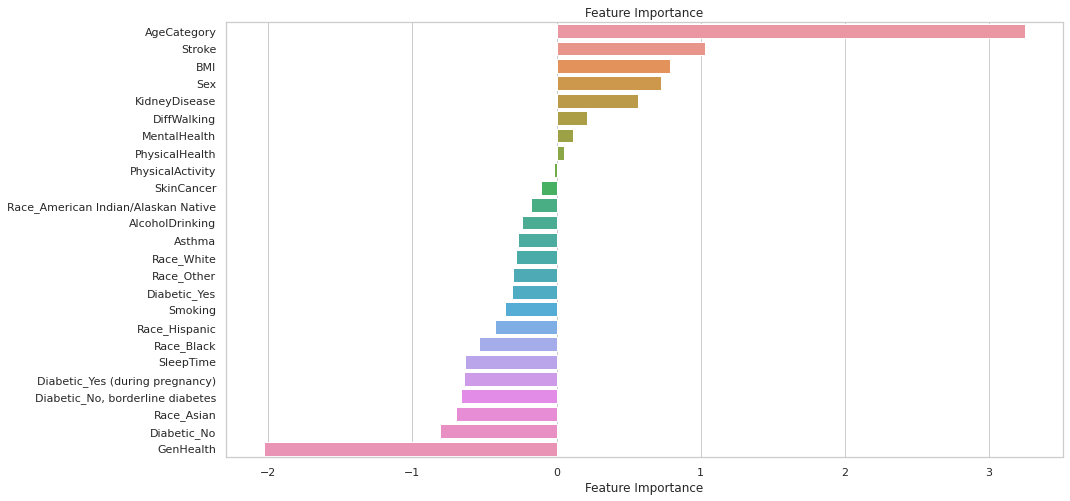

In [ ]:
from matplotlib import pyplot

plt.figure(figsize = (15, 8))
sns.barplot(x=importances["Feature Importance"], y= importances.index)
plt.title("Feature Importance")
plt.show()

### K-Nearest Neighbors

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 6)
model_knn.fit(x_train, y_train)
knn_y_pred = model_knn.predict(x_test)

In [ ]:
# Calculate FNR
knn_df = pd.DataFrame({'y' : list(y_test), 'y_pred' : knn_y_pred})
fn = len(knn_df[(lr_df['y'] == 1) & (knn_df['y_pred'] == 0)])
fp = len(knn_df[(lr_df['y'] == 0) & (knn_df['y_pred'] == 1)])
tn = len(knn_df[(lr_df['y'] == 0) & (knn_df['y_pred'] == 0)])
tp = len(knn_df[(lr_df['y'] == 1) & (knn_df['y_pred'] == 1)])
fnr = fn / (fn + tp)
tpr = tp / (fn + tp)
tnr = tn / (tn + fp)
fpr = fp / (tn + fp)
precision = tp / (tp + fp)
print(tpr, precision, fnr, tnr, fpr)

0.07474964234620887 0.4184184184184184 0.9252503576537912 0.9900457450271558 0.009954254972844244


Accuracy: 0.91
F1 Score: 0.1268396297982097
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     58367
         1.0       0.42      0.07      0.13      5592

    accuracy                           0.91     63959
   macro avg       0.67      0.53      0.54     63959
weighted avg       0.87      0.91      0.88     63959

Precission_score: 0.4184184184184184
Recall_score: 0.07474964234620887


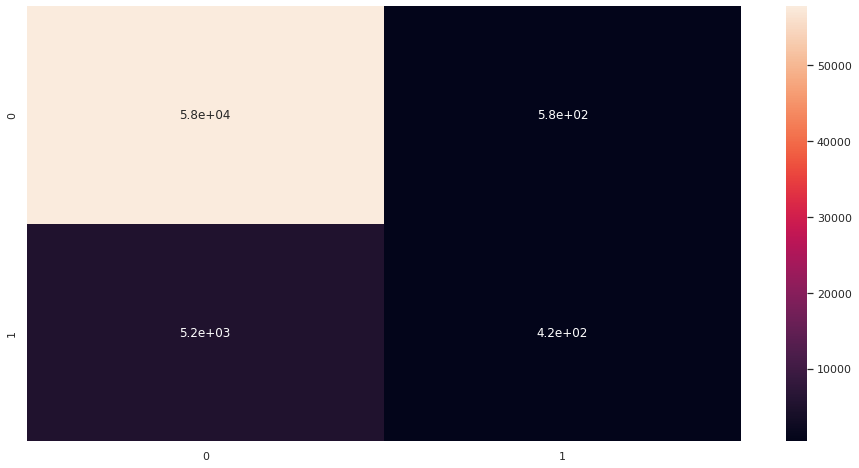

In [ ]:
knn_matrix = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_matrix, annot=True)

accuracy = round(accuracy_score(y_test,knn_y_pred), 4)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, knn_y_pred)
print("F1 Score:", f1)
report = classification_report(y_test, knn_y_pred)
print("Classification Report:\n", report)
print(f'Precission_score: {precision_score(y_test, knn_y_pred)}')
print(f'Recall_score: {recall_score(y_test, knn_y_pred)}')

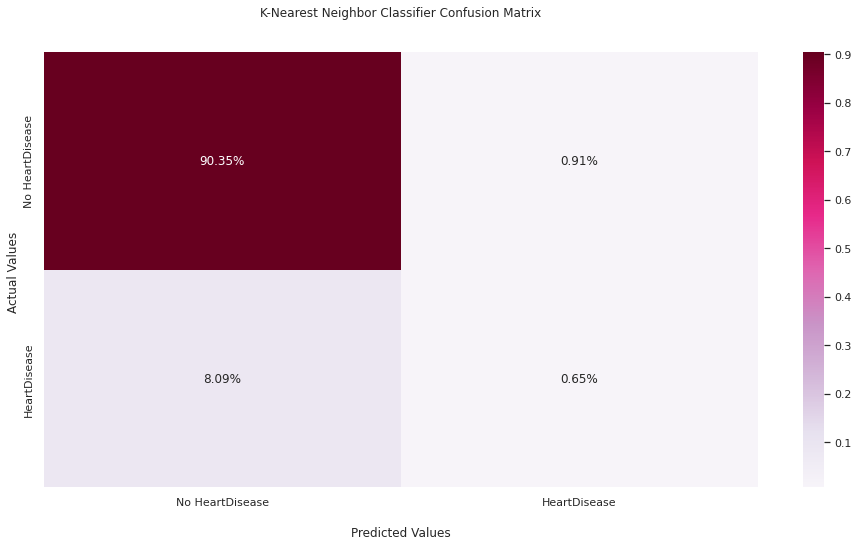

In [ ]:
ax = sns.heatmap(knn_matrix/np.sum(knn_matrix), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('K-Nearest Neighbor Classifier Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

error_rates = []
for i in range(5, 15):
    knn = RandomForestClassifier(criterion = 'entropy', max_depth = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rates.append(np.mean(y_pred != y_test))

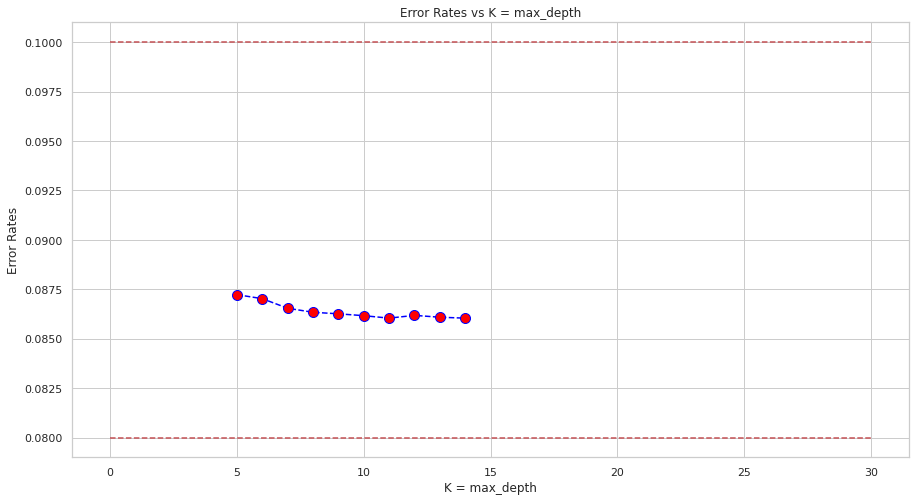

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(range(5, 15),error_rates,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rates vs K = max_depth')
plt.xlabel('K = max_depth')
plt.ylabel('Error Rates')
plt.hlines(y= 0.08, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y= 0.1, xmin=0, xmax=30, colors='r', linestyles="--");

In [ ]:
# Create Random Forest
model_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 13, n_estimators = 100)
model_rf.fit(x_train, y_train)
rf_y_pred = model_rf.predict(x_test)

In [ ]:
# Calculate FNR
rf_df = pd.DataFrame({'y' : list(y_test), 'y_pred' : rf_y_pred})
fn = len(rf_df[(rf_df['y'] == 1) & (rf_df['y_pred'] == 0)])
fp = len(rf_df[(rf_df['y'] == 0) & (rf_df['y_pred'] == 1)])
tn = len(rf_df[(rf_df['y'] == 0) & (rf_df['y_pred'] == 0)])
tp = len(rf_df[(rf_df['y'] == 1) & (rf_df['y_pred'] == 1)])
fnr = fn / (fn + tp)
tpr = tp / (fn + tp)
tnr = tn / (tn + fp)
fpr = fp / (tn + fp)
precision = tp / (tp + fp)
print(tpr, precision, fnr, tnr, fpr)

0.05507868383404864 0.5844402277039848 0.9449213161659513 0.9962478797950897 0.003752120204910309


Accuracy: 0.914
F1 Score: 0.100670044124857
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.95     58367
         1.0       0.58      0.06      0.10      5592

    accuracy                           0.91     63959
   macro avg       0.75      0.53      0.53     63959
weighted avg       0.89      0.91      0.88     63959

Precission_score: 0.5844402277039848
Recall_score: 0.05507868383404864


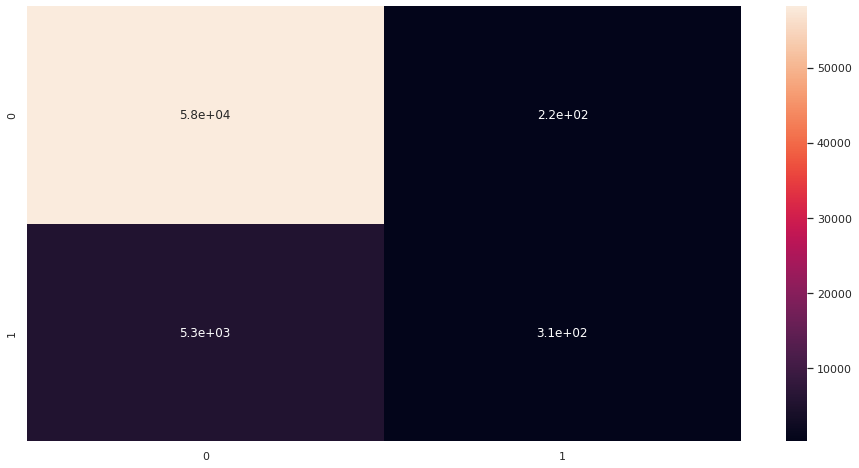

In [ ]:
rf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_matrix, annot=True)

accuracy = round(accuracy_score(y_test, rf_y_pred), 4)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, rf_y_pred)
print("F1 Score:", f1)
report = classification_report(y_test, rf_y_pred)
print("Classification Report:\n", report)
print(f'Precission_score: {precision_score(y_test,rf_y_pred)}')
print(f'Recall_score: {recall_score(y_test,rf_y_pred)}')

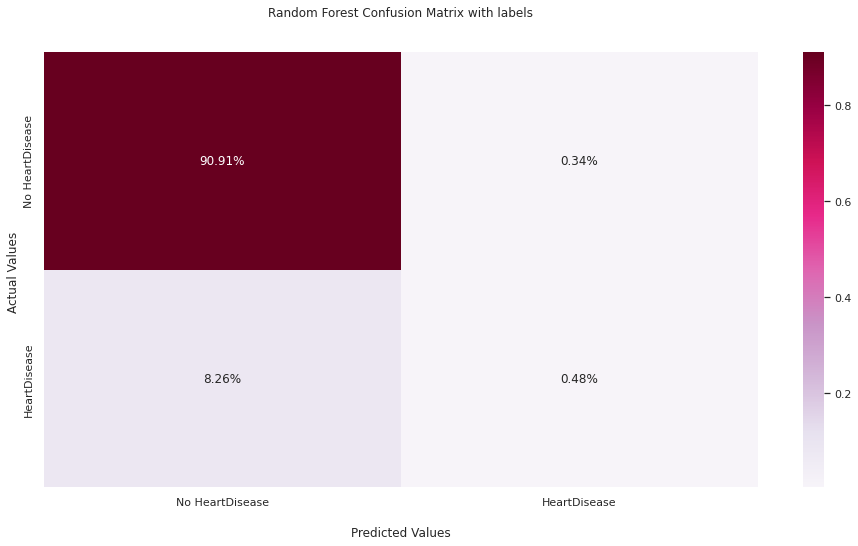

In [ ]:
ax = sns.heatmap(rf_matrix/np.sum(rf_matrix), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Random Forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
feature_importances = model_rf.feature_importances_

importances = pd.DataFrame(index = x_train.columns, data = feature_importances,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
importances

,Feature Importance
AgeCategory,0.263605
GenHealth,0.175330
BMI,0.071893
Stroke,0.063277
DiffWalking,0.056018
PhysicalHealth,0.049009
Sex,0.043966
Diabetic_Yes,0.042471
SleepTime,0.038058
Diabetic_No,0.036375


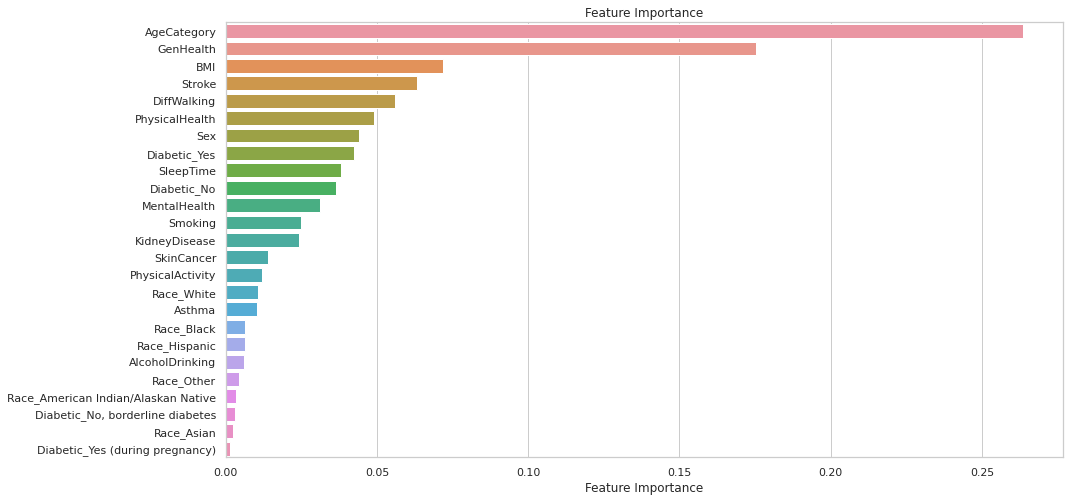

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(x=importances["Feature Importance"], y= importances.index)
plt.title("Feature Importance")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d08dd482-0c8d-44fb-8537-a415cdab67af' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>